# Importance of Feature Selection and predictive modelling using ANN for figuring out Breast Cancer activity.

This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, 
which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating 
duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010.
Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were
less than 1 month were excluded; thus, 4024 patients were ultimately included.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to filter out warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
cancer_df = pd.read_csv('C:/Users/personal/Documents/datasets/dataset/Breast_Cancer.csv')

In [4]:
cancer_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


The aim of this project is not centred on analysis but predictive modelling, so indepth analysis will not be carried out. But some
questions will be asked just for reference purposes such as;
- What race has the highest overrall risk factor?
- At what age does it seem necessary to start checking for breast cancer awareness?
- what is the estimated months for survival for any age?
- What is the marital status of those with high chance of breast cancer?
- what is the approx threshold of regional node to be considered safe from danger?

 Also, solutions to some begged questions can also be asked;
 
 
- what can one do to increase her chance of survival from the data gotten from the worst cases?
- application or adaptation of cultural behaviours of the race or region with lower cases
- steps to take to stop the regional node(N stage) from spreading

## Data wrangling

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
# there are no null values so the next step will be to encode categorical variables

In [7]:
# Importing label encoder to make all categorical columns have numerical values

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
# Create Encoder and Fit Necessary Columns
def encodeColumn(parameter):
    cancer_df[parameter] = encoder.fit_transform(cancer_df[parameter])

In [10]:
# Run Function
# This is a list showing the list of columns in the dataframe we would use to iterate through the function
listColumn = ['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status']

In [11]:
for i in listColumn:
    encodeColumn(i)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int32
 2   Marital Status          4024 non-null   int32
 3   T Stage                 4024 non-null   int32
 4   N Stage                 4024 non-null   int32
 5   6th Stage               4024 non-null   int32
 6   differentiate           4024 non-null   int32
 7   Grade                   4024 non-null   int32
 8   A Stage                 4024 non-null   int32
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int32
 11  Progesterone Status     4024 non-null   int32
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

In [12]:
cancer_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [13]:
#Since this is a predictive model, the target variable is the Status column

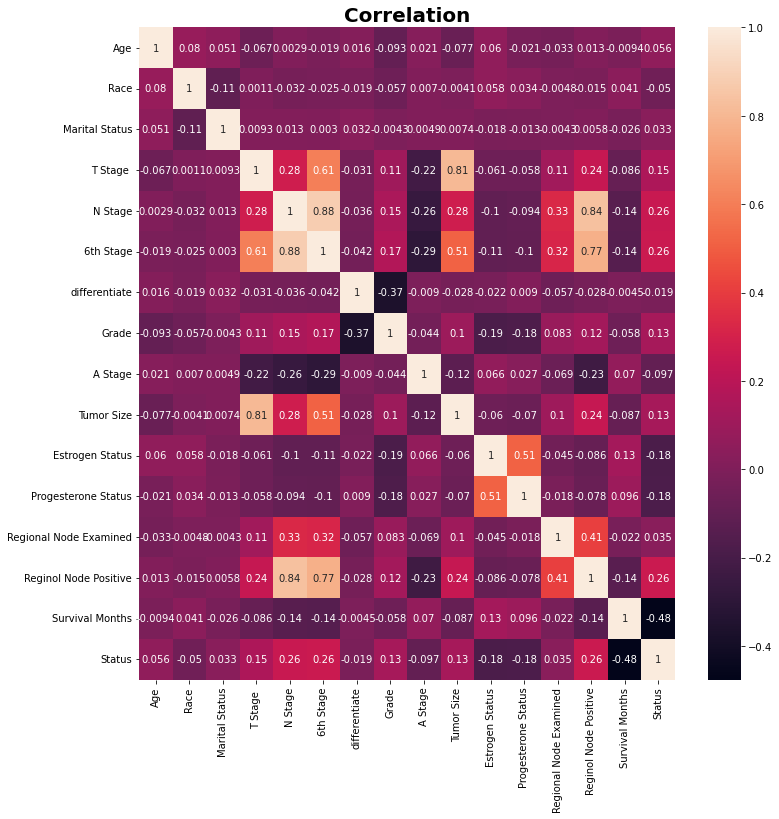

In [14]:
# Let's visualise using correlation heat maps
can = cancer_df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(can,annot=True)
plt.title("Correlation", fontsize =20, weight = "bold");

## Feature Selection

In any good model training pipeline, a critical component is deciding which features will be used as inputs to the model. For many models, a small
subset of the input variables provide the lion's share of predictive ability. It is important to lower the amount of input variables for many reasons
such as ;
- reducung multi collinearity
- reducing time to run the model and storage space 
- easy understanding of important points
- to reduce the curse of dimensionality.

In [15]:
# feature importance using tree based classifiers
X = cancer_df.drop('Status', axis =1) # independent columns
y = cancer_df['Status'] # dependent/target column

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
model = ExtraTreesClassifier()

In [18]:
model.fit(X, y)

ExtraTreesClassifier()

In [19]:
# plot graph of feature importance for better visualisation
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

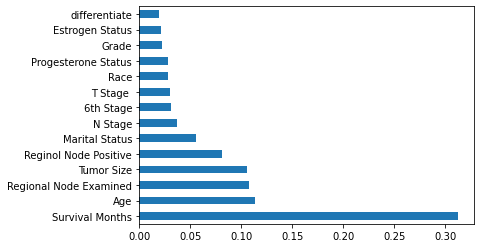

In [20]:
feat_importances.nlargest(14).plot(kind = 'barh')
plt.show()

The graph of feature importance shows that the columns; Survival months, age, regional node examined, tumor size, reginol node positive, marital 
status have more positive effect on the target variable than the other columns which may be considered redundant.

In [21]:
# checking another method to be sure
from sklearn.feature_selection import SelectKBest,chi2

In [22]:
# Use Kbest to get 8 numerical features relating to the target
best = SelectKBest(score_func=chi2, k = 8)

In [23]:
fit = best.fit(X, y)

In [24]:
scores_df = pd.DataFrame(fit.scores_)
columns_df = pd.DataFrame(X.columns)

scores_df_complete = pd.concat([columns_df, scores_df], axis = 1)
scores_df_complete.columns = ['Feature', 'Score']

print(scores_df_complete.nlargest(8, 'Score'))

                   Feature        Score
14         Survival Months  6731.442099
13   Reginol Node Positive  1663.529375
9               Tumor Size  1060.568970
5                6th Stage   324.105261
4                  N Stage   288.723650
3                 T Stage     71.895064
12  Regional Node Examined    22.226834
11     Progesterone Status    21.887241


#### from using two statistical methods to find out which feature makes the most sense to the prospective modelling, we can see that most of the output features are similar, so we work with the ones that appear twice and any other addition from the list.


In [25]:
# dropping columns from our dataframe to suit the experiment carried out above. We will be using : Survival months, Regional node examined, 
#Reginol node positive, Tumor size, Age, Projesterone status, N stage, T stage and 6th stage in our modelling.

In [26]:
cancer_df.drop(["Race", "Marital Status", "differentiate", "Grade", "A Stage", "Estrogen Status"], axis=1, inplace=True)

In [27]:
cancer_df.head()

,Age,T Stage,N Stage,6th Stage,Tumor Size,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,0,0,4,1,24,1,60,0
1,50,1,1,2,35,1,14,5,62,0
2,58,2,2,4,63,1,14,7,75,0
3,58,0,0,0,18,1,2,1,84,0
4,47,1,0,1,41,1,3,1,50,0


In [28]:
cancer_df.describe()

,Age,T Stage,N Stage,6th Stage,Tumor Size,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,0.784791,0.438370,1.321819,30.473658,0.826541,14.357107,4.158052,71.297962,0.153082
std,8.963134,0.765531,0.693479,1.266624,21.119696,0.378691,8.099675,5.109331,22.921430,0.360111
min,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,0.000000,16.000000,1.000000,9.000000,1.000000,56.000000,0.000000
50%,54.000000,1.000000,0.000000,1.000000,25.000000,1.000000,14.000000,2.000000,73.000000,0.000000
75%,61.000000,1.000000,1.000000,2.000000,38.000000,1.000000,19.000000,5.000000,90.000000,0.000000
max,69.000000,3.000000,2.000000,4.000000,140.000000,1.000000,61.000000,46.000000,107.000000,1.000000


#### Normalizing our data for uniformity

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
X = cancer_df.drop('Status', axis =1) # independent columns
y = cancer_df['Status'] # dependent/target column

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=46)

In [33]:
scaler = MinMaxScaler().fit(X_train)

In [34]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [35]:
input = X_train_s.shape[1]

## Implementing ANN for prediction

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import Dropout
from tensorflow import keras

In [37]:
mlp = models.Sequential([
    layers.Dense(500, activation='relu', input_shape = (input, )),
    Dropout(0.3),
    layers.Dense(256, activation='relu'),
    Dropout(0.3),
    layers.Dense(256, activation='relu'),
    Dropout(0.3),
    layers.Dense(8, activation='relu'),
    Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [38]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               5000      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               128256    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 2

In [39]:
mlp.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [40]:
model_history = mlp.fit(X_train_s, y_train, epochs=100,
                        batch_size = 50,
                       validation_data=(X_test_s, y_test))

Epoch 1/100
53/53 [==============================] - 1s 9ms/step - loss: 0.4877 - accuracy: 0.8272 - val_loss: 0.3406 - val_accuracy: 0.8467
Epoch 2/100
53/53 [==============================] - 0s 5ms/step - loss: 0.3605 - accuracy: 0.8658 - val_loss: 0.2832 - val_accuracy: 0.8907
Epoch 3/100
53/53 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.8887 - val_loss: 0.2809 - val_accuracy: 0.8928
Epoch 4/100
53/53 [==============================] - 0s 6ms/step - loss: 0.3428 - accuracy: 0.8845 - val_loss: 0.2804 - val_accuracy: 0.8872
Epoch 5/100
53/53 [==============================] - 0s 5ms/step - loss: 0.3315 - accuracy: 0.8891 - val_loss: 0.2782 - val_accuracy: 0.8928
Epoch 6/100
53/53 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.8922 - val_loss: 0.2803 - val_accuracy: 0.9028
Epoch 7/100
53/53 [==============================] - 0s 6ms/step - loss: 0.3316 - accuracy: 0.8895 - val_loss: 0.2768 - val_accuracy: 0.9021
Epoch 8/100
5

Epoch 59/100
53/53 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.9029 - val_loss: 0.2727 - val_accuracy: 0.9056
Epoch 60/100
53/53 [==============================] - 0s 5ms/step - loss: 0.2725 - accuracy: 0.9025 - val_loss: 0.2806 - val_accuracy: 0.9056
Epoch 61/100
53/53 [==============================] - 0s 6ms/step - loss: 0.2702 - accuracy: 0.9052 - val_loss: 0.2932 - val_accuracy: 0.9021
Epoch 62/100
53/53 [==============================] - 0s 6ms/step - loss: 0.2843 - accuracy: 0.9040 - val_loss: 0.2822 - val_accuracy: 0.9077
Epoch 63/100
53/53 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.9067 - val_loss: 0.2828 - val_accuracy: 0.9006
Epoch 64/100
53/53 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.9078 - val_loss: 0.2788 - val_accuracy: 0.9092
Epoch 65/100
53/53 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.9048 - val_loss: 0.2873 - val_accuracy: 0.9099
Epoch 

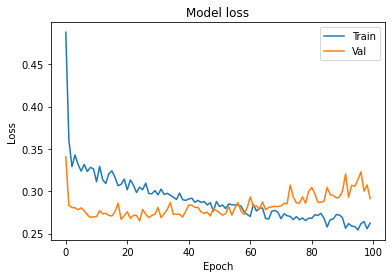

In [41]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

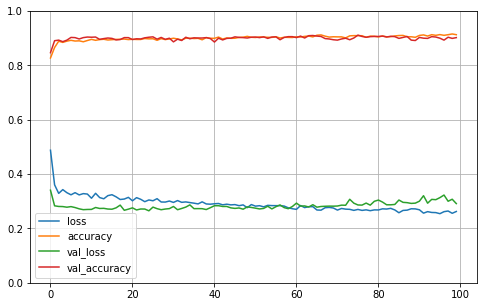

In [42]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
mlp.evaluate(X_test_s,y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9021


[0.2914063632488251, 0.9020581841468811]

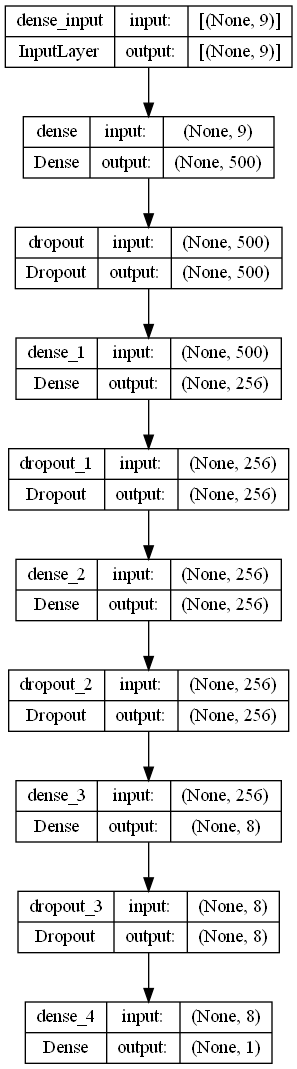

In [44]:
keras.utils.plot_model(mlp, "archy.png", show_shapes= True)